In [79]:
import csv
import pandas as pd
from pandas import *
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math
import seaborn as sns
import collections
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import xgboost
from numpy import linalg as LA
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [93]:
dataraw = pd.read_csv("C:\Users\gilad\Downloads\DataScienceFinalProject-master\data\data_rec.csv", index_col=0)
# remove all movies with no power score
data = dataraw[dataraw['year'] > 1980].drop(["title", "director", "actor1", "actor2", "actor3", "original_language", "id", "production_companies", "prod_company", "production_countries"], axis=1)
myX = pd.read_csv("C:\Users\gilad\Downloads\\finalProject\X.csv", index_col=0)
myX = myX[myX['year'] > 1980]
data.head()

,month,year,adjusted_budget,runtime,popularity,vote_average,vote_count,adjusted_revenue,genre_Action,genre_Adventure,...,actor2_gender_1.0,actor2_gender_2.0,actor3_gender_1.0,actor3_gender_2.0,director_noms,director_wins,prev_yr_gross_per_movie,prod_company_dom_box_office,prod_company_dom_box_office_per_movie,star_power
0,10,1995,4.825716e+07,81.0,21.946943,7.7,5415.0,6.008886e+08,0.0,0.0,...,0,1,0,1,65,36,1.191214e+07,4939873843,235232087,472
1,12,1995,1.045572e+08,104.0,17.015539,6.9,2413.0,4.227283e+08,0.0,1.0,...,0,1,1,0,8,2,1.191214e+07,1643337362,45648260,142
2,12,1995,2.573715e+07,127.0,3.859495,6.1,34.0,1.310217e+08,0.0,0.0,...,1,0,1,0,101,56,1.191214e+07,1593531455,54949360,94
3,2,1995,0.000000e+00,106.0,8.387519000000001,5.7,173.0,1.231827e+08,0.0,0.0,...,1,0,0,1,5,2,1.191214e+07,0,0,125
4,12,1995,9.651433e+07,170.0,17.924927,7.7,1886.0,3.015056e+08,1.0,0.0,...,0,1,0,1,46,17,1.191214e+07,5264430500,39286794,152


In [94]:
print myX.shape
print Y.shape

(5264, 44)
(5264, 1)


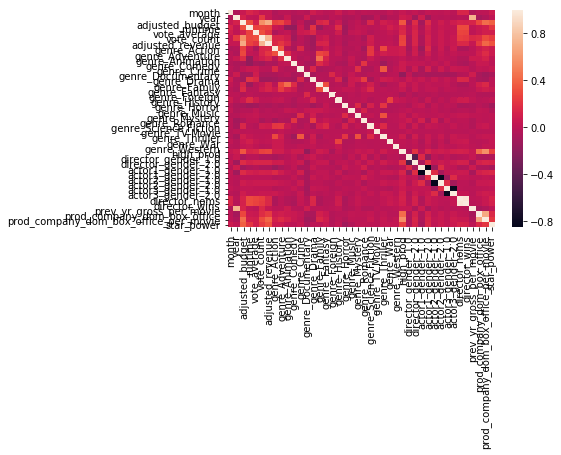

In [95]:
%matplotlib inline

# calculate the correlation matrix
corr = data.corr()

# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

In [96]:
c = data.corr()['adjusted_revenue'].abs()
so = c.sort_values(kind='quicksort')
print "the following lists all the correlation values of all features with our label, the movie revenue:\n"
print(so)

the following lists all the correlation values of all features with our label, the movie revenue:

genre_TV Movie                           0.002921
genre_Western                            0.005839
actor2_gender_1.0                        0.006633
genre_Mystery                            0.007754
genre_Music                              0.012304
genre_History                            0.012742
genre_Crime                              0.012837
actor3_gender_1.0                        0.014953
genre_Thriller                           0.016627
genre_Romance                            0.027539
genre_War                                0.028620
genre_Foreign                            0.032004
prev_yr_gross_per_movie                  0.044231
year                                     0.048288
month                                    0.050172
genre_Comedy                             0.051970
director_gender_1.0                      0.053169
actor3_gender_2.0                        0.057889
a

In [97]:
# separate data into features and label
X = data.drop(['adjusted_revenue'], axis=1)
Y = data[['adjusted_revenue']]

In [98]:
#new_X = X.drop(["title", "director", "actor1", "actor2", "actor3", "original_language", "id", "production_companies", "prod_company", "production_countries"], axis=1)
#new_X.to_csv("C:\Users\gilad\Downloads\\finalProject\X.csv")
#Y.to_csv("C:\Users\gilad\Downloads\\finalProject\Y.csv")

In [99]:
X_train, X_test, y_train, y_test = train_test_split(myX, Y, test_size=0.2, random_state=1)

In [100]:
#from sklearn.utils import check_arrays
def mean_absolute_percentage_error(y_true, y_pred): 
    #y_true, y_pred = check_arrays(y_true, y_pred)

    ## Note: does not handle mix 1d representation
    #if _is_1d(y_true): 
    #    y_true, y_pred = _check_1d_array(y_true, y_pred)

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

### Linear Regression

In [101]:
regr = linear_model.LinearRegression()
#Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))


#
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, y_pred))
print("mean_absolute_percentage_error: %.2f"
      % mean_absolute_percentage_error(y_test, y_pred))

# Plot outputs
# plt.scatter(X_test, y_test,  color='black')
# plt.plot(X_test, y_pred, color='blue', linewidth=3)

# plt.xticks(())
# plt.yticks(())

# plt.show()

('Coefficients: \n', array([[ -2.24329123e+06,   1.36910852e+00,   1.55707602e+05,
          1.62555563e+04,   1.75043728e+06,   8.59904468e+04,
         -5.04054095e+06,   1.47750103e+07,   1.31996433e+07,
          5.19436349e+06,  -2.56996975e+06,   3.14547436e+06,
         -7.11442075e+06,   9.15805520e+06,  -4.91553126e+06,
         -1.10882076e+07,  -1.61486140e+07,   4.46256778e+06,
         -4.99609743e+06,  -8.68447498e+05,   1.15209083e+07,
         -2.32115789e+07,   4.47552698e+07,  -8.72975564e+06,
          1.34067801e+06,  -2.22177927e+07,  -1.03358035e+07,
         -6.26416200e+06,  -3.06483355e+06,  -1.12777837e+07,
         -1.91180464e+07,   3.05126854e+06,  -2.47077468e+05,
         -7.14551073e+06,  -6.74259836e+06,  -8.16413660e+05,
          1.66050233e+06,  -1.94653869e-03,   5.72300189e-01,
          1.00646710e+05,   2.70260048e+07,   2.36700771e+07,
         -2.44061478e+05,  -1.49287761e+07]]))
Mean squared error: 16793316375217622.00
Variance score: 0.69
Me

### PCA

In [102]:
pca = PCA(n_components=5)
pca.fit(myX)
print(pca.singular_values_) 
print(pca.components_) 

[  3.69938541e+11   3.46816714e+09   2.09462985e+09   7.15728572e+04
   8.38015957e+03]
[[ -1.77727166e-10   2.69045346e-03   2.58513258e-10   2.99909125e-10
    1.16841955e-11   4.23857966e-08   6.18046124e-12   7.03622281e-12
    3.03316563e-12   6.23409417e-12   1.83051450e-12  -2.80762049e-12
   -6.77770360e-12   6.44051566e-12   3.59825623e-12  -3.80208671e-13
   -3.15036888e-13  -6.31174951e-13   9.02286558e-13   8.88257543e-13
    1.40101194e-12   2.56627025e-12  -5.58304688e-14   2.44672180e-12
   -2.61395119e-13  -2.06987856e-13   3.91441554e-11  -1.92156751e-12
    9.23666060e-12  -3.60758198e-12   9.04541726e-12   8.55265231e-13
    6.16035888e-12   1.16341256e-12   5.28994583e-12   1.74076025e-10
    4.67076896e-11   9.99978821e-01   5.92609907e-03   3.84130316e-09
    6.07115153e-12   2.76466899e-12   5.78938687e-12  -4.37465552e-12]
 [  2.89483938e-08   9.33287219e-01   1.25106615e-07   7.62054547e-08
    2.69661972e-09   1.39335114e-05   2.29215239e-09   2.23282298e-09
 

### standardize 

In [103]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(myX)
X_std.shape

(5264L, 44L)

In [104]:
pca = PCA(n_components=5)
pca.fit(X_std)
print(pca.singular_values_) 
print(pca.components_) 

[ 145.50673884  120.95996133  109.3329601   104.6206905    99.31898917]
[[  2.66099455e-02   3.66081995e-01   2.14926694e-01   2.23747509e-01
    1.83634314e-01   3.32173228e-01   1.51225485e-01   1.70620414e-01
    7.55148171e-02  -3.42303576e-02   6.58600130e-02  -9.24165391e-02
   -5.97165701e-03   8.65750549e-02   9.30873660e-02  -4.38987407e-02
    6.00976766e-02  -5.42840725e-02  -1.42335378e-02   3.69178228e-02
   -3.28937830e-02   9.19628737e-02  -3.74126799e-03   8.57294520e-02
    5.51960073e-02   3.17747904e-02   3.02751976e-01  -9.91452932e-02
    1.89320453e-01  -1.19839883e-01   1.88472358e-01   2.73707773e-02
    5.88412765e-02   4.79924805e-03   8.35754225e-02   1.99520710e-01
    1.93253571e-01   2.43845545e-01   3.16393573e-01   2.31283031e-01
    6.57677570e-02   4.10559621e-02   9.32300905e-02   5.16755524e-02]
 [  5.43225005e-02  -9.85778393e-02   2.68127042e-01   2.21239615e-02
    1.96806162e-01   4.24395689e-02  -8.35593532e-02  -2.07515212e-01
   -2.70210760e-0

In [105]:
# cov = np.cov(X_std)
# w, v = LA.eig(cov)

In [106]:
# print w
# print v

In [107]:
cor_mat1 = np.corrcoef(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cor_mat1)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-0.02656582 -0.05329127 -0.15217576 ..., -0.15656222  0.03981832
   0.00684063]
 [-0.36604281  0.09868055 -0.05351724 ..., -0.10219886 -0.08085277
   0.06264461]
 [-0.21494242 -0.26825379 -0.05998664 ...,  0.09222651 -0.38677936
  -0.02756769]
 ..., 
 [-0.04097218  0.19282858 -0.05845826 ..., -0.00708917 -0.06088899
  -0.12340018]
 [-0.09306374 -0.0026673  -0.08042828 ...,  0.19258715  0.07580889
   0.02490819]
 [-0.05162812 -0.22931602 -0.00402238 ...,  0.0582961  -0.04067751
   0.04123206]]

Eigenvalues 
[ 4.02208087  2.77975514  2.27285941  2.08047669  1.88073392  1.74902995
  1.73165732  1.52426365  1.51233498  0.02287098  1.36027397  0.08898675
  0.11015223  0.1991356   1.25773046  1.2147419   1.19273912  0.26244408
  0.29677363  1.11376095  1.07571467  0.39493118  1.02767171  1.01239798
  0.98146879  0.97674733  0.94198809  0.43483942  0.44199541  0.47703459
  0.48612987  0.51449886  0.5290731   0.87935311  0.86962675  0.8424433
  0.80079634  0.57937536  0.5978630

In [108]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
4.02208087495
2.77975513808
2.27285941351
2.08047669028
1.88073391975
1.74902995295
1.73165731748
1.52426364989
1.5123349827
1.36027397104
1.25773046394
1.21474189716
1.19273912479
1.11376094522
1.07571467043
1.02767170951
1.01239798148
0.981468788775
0.976747330202
0.94198808607
0.879353111788
0.869626748494
0.842443296529
0.800796336618
0.744013965302
0.717814880936
0.697806961292
0.669465593447
0.634148085467
0.597863062371
0.579375361405
0.529073095605
0.514498861497
0.486129870842
0.477034589112
0.44199540637
0.434839418373
0.394931177966
0.29677362765
0.262444082494
0.199135595607
0.110152233067
0.0889867539003
0.0228709756517


In [109]:
print " the indices of the highest eignevalues are:"
top20comp = eig_vals.argsort()[-20:][::-1]
top20comp

top7comp = eig_vals.argsort()[-7:][::-1]
top7comp

 the indices of the highest eignevalues are:


array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

In [111]:
print "the top 7 principal components are: "
myX.iloc[:0,top7comp]

the top 7 principal components are: 


,year,adjusted_budget,runtime,popularity,vote_average,vote_count,genre_Action
month,,,,,,,


### XGBOOST

In [112]:
xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75, colsample_bytree=1, max_depth=7)
xgb.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = xgb.predict(X_test)

In [113]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, y_pred))

print y_test.shape
print y_pred.shape
print("mean_absolute_percentage_error: %.2f"
      % mean_absolute_percentage_error(np.ravel(y_test), np.ravel(y_pred)))

('Coefficients: \n', array([[ -2.24329123e+06,   1.36910852e+00,   1.55707602e+05,
          1.62555563e+04,   1.75043728e+06,   8.59904468e+04,
         -5.04054095e+06,   1.47750103e+07,   1.31996433e+07,
          5.19436349e+06,  -2.56996975e+06,   3.14547436e+06,
         -7.11442075e+06,   9.15805520e+06,  -4.91553126e+06,
         -1.10882076e+07,  -1.61486140e+07,   4.46256778e+06,
         -4.99609743e+06,  -8.68447498e+05,   1.15209083e+07,
         -2.32115789e+07,   4.47552698e+07,  -8.72975564e+06,
          1.34067801e+06,  -2.22177927e+07,  -1.03358035e+07,
         -6.26416200e+06,  -3.06483355e+06,  -1.12777837e+07,
         -1.91180464e+07,   3.05126854e+06,  -2.47077468e+05,
         -7.14551073e+06,  -6.74259836e+06,  -8.16413660e+05,
          1.66050233e+06,  -1.94653869e-03,   5.72300189e-01,
          1.00646710e+05,   2.70260048e+07,   2.36700771e+07,
         -2.44061478e+05,  -1.49287761e+07]]))
Mean squared error: 15357856885733406.00
Variance score: 0.72
Me

### xgboost with the standardized data

In [114]:
# xgb2 = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75, colsample_bytree=1, max_depth=7)
# xgb2.fit(X_std, y_train)

# # Make predictions using the testing set
# y_pred = xgb2.predict(X_test)

In [115]:
# # The coefficients
# print('Coefficients: \n', regr.coef_)
# # The mean squared error
# print("Mean squared error: %.2f"
#       % mean_squared_error(y_test, y_pred))
# # Explained variance score: 1 is perfect prediction
# print('Variance score: %.2f' % r2_score(y_test, y_pred))

# print("Mean absolute error: %.2f"
#       % mean_absolute_error(y_test, y_pred))

# print y_test.shape
# print y_pred.shape
# print("mean_absolute_percentage_error: %.2f"
#       % mean_absolute_percentage_error(np.ravel(y_test), np.ravel(y_pred)))

### The bootstrap

### Ridge regression

In [116]:
from sklearn.linear_model import Ridge
clf = Ridge(alpha=1.0)
clf.fit(X_train, y_train) 
y_test = clf.predict(X_test)

In [117]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, y_pred))

print y_test.shape
print y_pred.shape
print("mean_absolute_percentage_error: %.2f"
      % mean_absolute_percentage_error(np.ravel(y_test), np.ravel(y_pred)))

('Coefficients: \n', array([[ -2.24329123e+06,   1.36910852e+00,   1.55707602e+05,
          1.62555563e+04,   1.75043728e+06,   8.59904468e+04,
         -5.04054095e+06,   1.47750103e+07,   1.31996433e+07,
          5.19436349e+06,  -2.56996975e+06,   3.14547436e+06,
         -7.11442075e+06,   9.15805520e+06,  -4.91553126e+06,
         -1.10882076e+07,  -1.61486140e+07,   4.46256778e+06,
         -4.99609743e+06,  -8.68447498e+05,   1.15209083e+07,
         -2.32115789e+07,   4.47552698e+07,  -8.72975564e+06,
          1.34067801e+06,  -2.22177927e+07,  -1.03358035e+07,
         -6.26416200e+06,  -3.06483355e+06,  -1.12777837e+07,
         -1.91180464e+07,   3.05126854e+06,  -2.47077468e+05,
         -7.14551073e+06,  -6.74259836e+06,  -8.16413660e+05,
          1.66050233e+06,  -1.94653869e-03,   5.72300189e-01,
          1.00646710e+05,   2.70260048e+07,   2.36700771e+07,
         -2.44061478e+05,  -1.49287761e+07]]))
Mean squared error: 4504847903529846.00
Variance score: 0.85
Mea

In [120]:
alphToMAPE = {}
for alpha in [.01,.1,.5,1,3,5,10,20,30,40,50]:
    print "alpha is " + str(alpha)
    clf = Ridge(alpha=alpha)
    clf.fit(X_train, y_train) 
    y_test = clf.predict(X_test)
    # The coefficients
    #print('Coefficients: \n', regr.coef_)
    # The mean squared error
    print("Mean squared error: %.2f"
          % mean_squared_error(y_test, y_pred))
    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.2f' % r2_score(y_test, y_pred))

    print("Mean absolute error: %.2f"
          % mean_absolute_error(y_test, y_pred))

    print("mean_absolute_percentage_error: %.2f"
          % mean_absolute_percentage_error(np.ravel(y_test), np.ravel(y_pred)))
    alphToMAPE[alpha] = mean_absolute_percentage_error(y_test, y_pred)

alpha is 0.01
Mean squared error: 4506057826003741.00
Variance score: 0.85
Mean absolute error: 39546795.38
mean_absolute_percentage_error: 123.28
alpha is 0.1
Mean squared error: 4505933862634552.00
Variance score: 0.85
Mean absolute error: 39545409.39
mean_absolute_percentage_error: 123.31
alpha is 0.5
Mean squared error: 4505421252732785.00
Variance score: 0.85
Mean absolute error: 39539681.21
mean_absolute_percentage_error: 124.36
alpha is 1
Mean squared error: 4504847903529846.00
Variance score: 0.85
Mean absolute error: 39533256.03
mean_absolute_percentage_error: 130.31
alpha is 3
Mean squared error: 4502966726854106.50
Variance score: 0.85
Mean absolute error: 39511248.19
mean_absolute_percentage_error: 811.26
alpha is 5
Mean squared error: 4501414907299736.00
Variance score: 0.85
Mean absolute error: 39492115.54
mean_absolute_percentage_error: 122.10
alpha is 10
Mean squared error: 4498138445902767.50
Variance score: 0.85
Mean absolute error: 39450660.24
mean_absolute_percentag

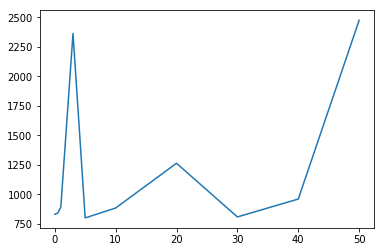

{0.5: 842.62124574137124, 1: 893.02267456431036, 3: 2362.4594907222117, 5: 801.01259748867938, 0.1: 833.13936021502377, 40: 960.69339688758964, 10: 884.66076356622773, 50: 2474.5212104957113, 20: 1263.7415048796859, 30: 809.45297968709815, 0.01: 832.02401101109876}


In [121]:
lists = sorted(alphToMAPE.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.plot(x, y)
plt.show()
print alphToMAPE

#### After getting good results for ridge with alpha of 1 (222 percent MAPE), we decided to go ahead and explore different values of alphas to find the optimal one. Alpha of 30 seems to be the best with MAPE value of 113.5%. We are aware of a common effect of large alphas to cause overfitting, however we are working with a validation set so we believe that it is not an issue in this case.

In [122]:
from sklearn.linear_model import RidgeCV

clf = RidgeCV(alphas=[1,2,3,20,25,30], cv=50)
clf.fit(X_train, y_train) 
y_test = clf.predict(X_test)

In [123]:
# The coefficients
#print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, y_pred))

print y_test.shape
print y_pred.shape
print("mean_absolute_percentage_error: %.2f"
      % mean_absolute_percentage_error(np.ravel(y_test), np.ravel(y_pred)))

Mean squared error: 4488018585522656.50
Variance score: 0.85
Mean absolute error: 39340084.90
(1053L, 1L)
(1053L,)
mean_absolute_percentage_error: 113.15


#### Using ridgeCV, and experimenting with various cv and alphas values, we get the same MAPE value of 113.15. 

### Lasso regression

In [133]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.01, max_iter=50)
clf.fit(X_train, y_train) 
y_test = clf.predict(X_test)

In [134]:
# The coefficients
#print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, y_pred))

print y_test.shape
print y_pred.shape
print("mean_absolute_percentage_error: %.2f"
      % mean_absolute_percentage_error(np.ravel(y_test), np.ravel(y_pred)))

Mean squared error: 4496101107853912.00
Variance score: 0.85
Mean absolute error: 39440609.83
(1053L,)
(1053L,)
mean_absolute_percentage_error: 120.38


### We have experimented with various Lasso regression parameters. The best we get is a MAPE score of 123.28%. Also, we've discovered that increasing the max_iter value produces a slightly better value (3%)

### Grid search CV

In [156]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
model = linear_model.LinearRegression()
parameters = {'copy_X':[True, False]}
grid = GridSearchCV(model,parameters, cv=None)
grid.fit(X_train, y_train)
print "r2 / variance : ", grid.best_score_

r2 / variance :  0.67927524567


In [157]:
y_test = grid.predict(X_test)

# The coefficients
#print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, y_pred))

print y_test.shape
print y_pred.shape
print("mean_absolute_percentage_error: %.2f"
      % mean_absolute_percentage_error(np.ravel(y_test), np.ravel(y_pred)))


Mean squared error: 4506072316470216.00
Variance score: 0.85
Mean absolute error: 39546951.51
(1053L, 1L)
(1053L,)
mean_absolute_percentage_error: 123.28


### Above you can see the results for a cross validated grid-search. We got 123.28% of MAPE, which worse thatn our best model so far.